<a href="https://colab.research.google.com/github/SUPERREALCODER/Quantum-Challenge/blob/main/1b_QML_Tools_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# International Faculty Development Program on _“Quantum Artificial Intelligence”_

In [1]:
!pip install qiskit


In [4]:
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 33.9 MB/s eta 0:00:00


In [5]:
from qiskit_aer import AerSimulator
simulator = AerSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(count)


NameError: name 'circ' is not defined

In [ ]:
import qiskit_runtime

ModuleNotFoundError: No module named 'qiskit_runtime'

## Quantum Machine Learning Tools

#### Contents

1. Amplitude Encoding.
2. Swap Test.
3. Quantum Fourier Transformation (QFT).
4. Quantum Phase Estimation (QPE).
5. Harrow–Hassidim–Lloyd (HHL) Algorithm.

### Amplitude Encoding

Let $\mathbf{x}=\begin{pmatrix}x_0\\x_1\\\vdots\\x_{N-1}\end{pmatrix}$ be a unit vector for $N=2^n$ for some $n$. Then the corresponding quantum state would be $$|x\rangle=\sum_{i=0}^{N-1}x_i|i\rangle.$$ where $\{|i\rangle\}_i$ is an orthonormal basis.

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.visualization import plot_histogram
from math import sqrt
from qiskit_aer import AerSimulator

x = [sqrt(0.03),
     sqrt(0.07),
     sqrt(0.15),
     sqrt(0.05),
     sqrt(0.1),
     sqrt(0.3),
     sqrt(0.2),
     sqrt(0.1)]

In [ ]:
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 48.1 MB/s eta 0:00:00


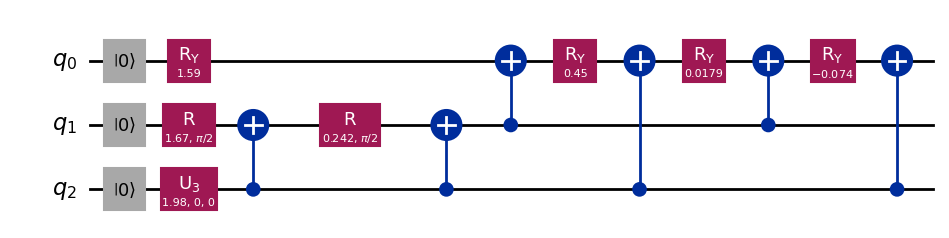

In [7]:
qc = QuantumCircuit(3)
qc.initialize(x, [0,1,2])
qc.decompose().decompose().decompose().decompose().decompose().decompose().draw('mpl')

In [2]:
!pip install pylatexenc


Total count are: {'011': 5063, '111': 10139, '100': 9983, '000': 2979, '010': 14977, '001': 7071, '110': 19908, '101': 29880}


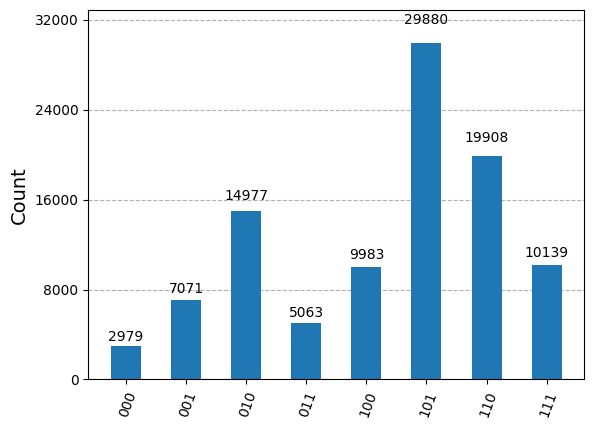

In [8]:
qc.measure_all()

simulator = AerSimulator()
result = simulator.run(qc, shots = 100000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

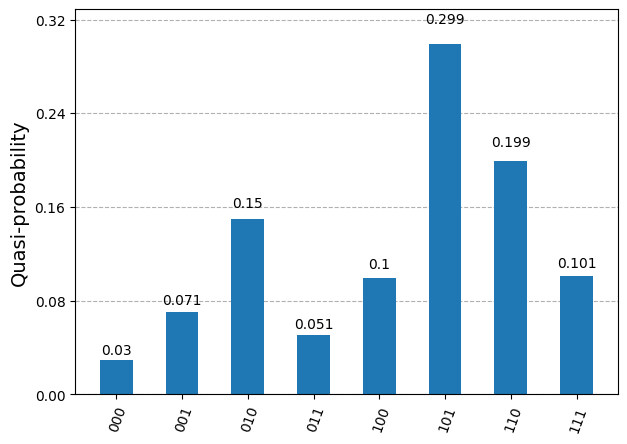

In [9]:
from qiskit.visualization import plot_distribution

plot_distribution(counts)

### Swap test

Swap test gives inner product $\langle\phi|\psi\rangle$ of two vectors $|\phi\rangle$ and $|\psi\rangle$. Consider the following circuit:
![SWAP test circuit](https://upload.wikimedia.org/wikipedia/commons/d/d6/Quantum-swap-test-circuit-correct.png)

This circuit performs a `swap test` for $|\phi\rangle$ and $|\psi\rangle$. Depending on the measurement outcome, the inner product betwen these two vectors would be given by, $$|\langle\phi|\psi\rangle|\approx\sqrt{2\cdot P(|0\rangle)-1}=\sqrt{1-2\cdot P(|1\rangle)}.$$ Note that fidelity is given by $|\langle\phi|\psi\rangle|^2.$

In [10]:
# Choose two vector randomly
from qiskit.quantum_info import random_statevector

phi = random_statevector(2)
psi = random_statevector(2)
phi, psi

(Statevector([-0.13950662-0.80425532j,  0.54619255-0.18810893j],
             dims=(2,)),
 Statevector([-0.35124592-0.80588784j,  0.4751496 +0.03746931j],
             dims=(2,)))

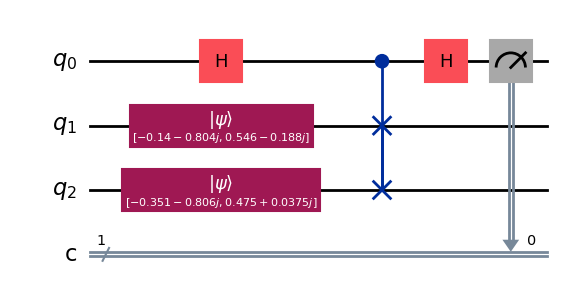

In [11]:
# Perform SWAP test
swap = QuantumCircuit(3, 1)
swap.initialize(phi, 1)
swap.initialize(psi, 2)
swap.h(0)
swap.cswap(0, 1, 2)
swap.h(0)
swap.measure(0, 0)
swap.draw('mpl')

In [12]:
result = simulator.run(swap).result()
counts = result.get_counts()
print(f'Counts: {counts}')

# Calculate the probability
prob = {'0': counts['0']/(counts['0']+counts['1']), '1': counts['1']/(counts['0']+counts['1'])}
print(f'Probabilities: {prob}')

Counts: {'1': 58, '0': 966}
Probabilities: {'0': 0.943359375, '1': 0.056640625}


In [13]:
# Find the inner product
inner_product = sqrt(2*prob['0']-1)
print(f'square of inner product = {inner_product}')

from qiskit.quantum_info import state_fidelity

print(f'fidelity = {state_fidelity(phi, psi)}')

square of inner product = 0.9416574483324602
fidelity = 0.9053961217430132


Another application of swap test is calculating distance between two vectors. Let $|A\rangle,|B\rangle$ be two vectors. Define $$\begin{aligned}|\phi\rangle&:=\frac{1}{\sqrt{2}}\left[|0\rangle\otimes|A\rangle+|1\rangle\otimes|B\rangle\right],\\|\psi\rangle&:=\frac{1}{\sqrt{C}}\left[|A||0\rangle-|B||1\rangle\right],\end{aligned}$$ where $C=|A|^2+|B|^2$.

Then the swap test for $|\psi\rangle$ and first qubit of $|\phi\rangle$ gives $$|A-B|^2=2C(2P(|0\rangle)-1).$$

In [14]:
def swap_test(qc, swap):
    '''Performs swap test and return probability of |0⟩
    Arguments:
        qc: A quantum circuit to perform swap test
        swap: Target qubits (to be swapped)
    '''

    meas = ClassicalRegister(1)
    targ = QuantumRegister(1)
    qc.add_register(meas, targ)
    qc.h(targ)
    qc.cswap(targ, swap[0], swap[1])
    qc.h(targ)
    qc.measure(targ, 0)

    counts = simulator.run(qc).result().get_counts()

    return counts['0']/(counts['0']+counts['1'])

Quantum Distance:  2.825
Euclidean Distance:  2.83


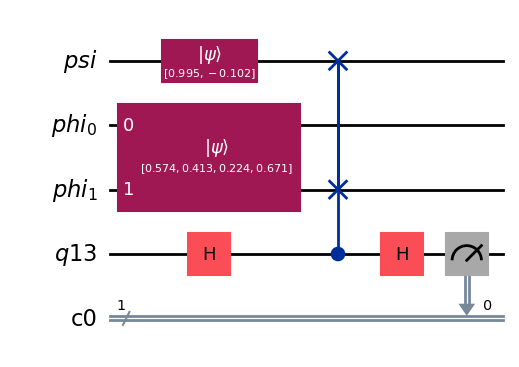

In [15]:
from numpy import linalg, log2

# Given A and B
A = [2.5, 1.8]
B = [0.1, 0.3]

norm_A = linalg.norm(A)
norm_B = linalg.norm(B)
Dist = 0
for i in range(len(A)):
    Dist += (A[i] - B[i]) ** 2

Dist = sqrt(Dist)
C = norm_A**2 + norm_B**2

# Create phi and psi state with the data
psi = [norm_A/sqrt(C), -norm_B/sqrt(C)]
phi = [a/(norm_A*sqrt(2)) for a in A] + [b/(norm_B*sqrt(2)) for b in B]


q1 = QuantumRegister(1, name = 'psi')
q2 = QuantumRegister(int(log2(len(A)))+1, name = 'phi')
qc = QuantumCircuit(q1,q2)

# States initialization
qc.initialize(psi, q1)
qc.initialize(phi, q2)

# Apply SWAP test
prob = swap_test(qc, (q1, q2[-1]))
dist = sqrt(2*C*(2*prob - 1))

print('Quantum Distance: ', round(dist,3))
print('Euclidean Distance: ',round(Dist,3))

qc.draw('mpl')

### Quantum Fourier Transformation (QFT)

The discrete Fourier transform acts on a vector $(x_0, ..., x_{N-1})$ and maps it to the vector $(y_0, ..., y_{N-1})$ according to the formula


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$


where $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.

Similarly, the quantum Fourier transform acts on a quantum state $\vert X\rangle = \sum_{j=0}^{N-1} x_j \vert j \rangle$ and maps it to the quantum state $\vert Y\rangle = \sum_{k=0}^{N-1} y_k \vert k \rangle$ according to the formula


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$


with $\omega_N^{jk}$ defined as above. Note that only the amplitudes of the state were affected by this transformation.

This can also be expressed as the map:


$$\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk} \vert k \rangle$$



Or the unitary matrix:


$$ U_{QFT} = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} \sum_{k=0}^{N-1} \omega_N^{jk} \vert k \rangle \langle j \vert$$

The quantum Fourier transform (QFT) transforms between two bases, the computational (Z) basis, and the Fourier basis. The H-gate is the single-qubit QFT, and it transforms between the Z-basis states $|0\rangle$ and $|1\rangle$ to the X-basis states $|{+}\rangle$ and $|{-}\rangle$. In the same way, all multi-qubit states in the computational basis have corresponding states in the Fourier basis. The QFT is simply the function that transforms between these bases.

$$
|\text{State in Computational Basis}\rangle \quad \xrightarrow[]{\text{QFT}} \quad |\text{State in Fourier Basis}\rangle
$$

$$
\text{QFT}|x\rangle = |\widetilde{x}\rangle
$$

(We often note states in the Fourier basis using the tilde (~)).

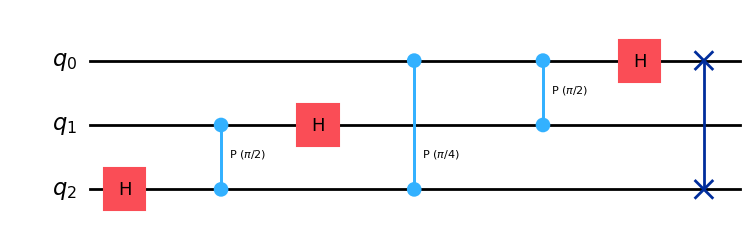

In [16]:
# Import qiskit's in-built QFT
from qiskit.circuit.library import QFT

num_qubits = 3

qc = QuantumCircuit(num_qubits)
qc = qc.compose(QFT(num_qubits))
qc.decompose().draw('mpl')

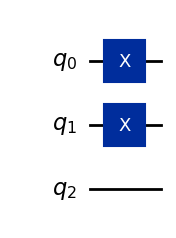

In [17]:
# Example QFT
qc = QuantumCircuit(num_qubits)
qc.x([0, 1])
qc.draw('mpl')

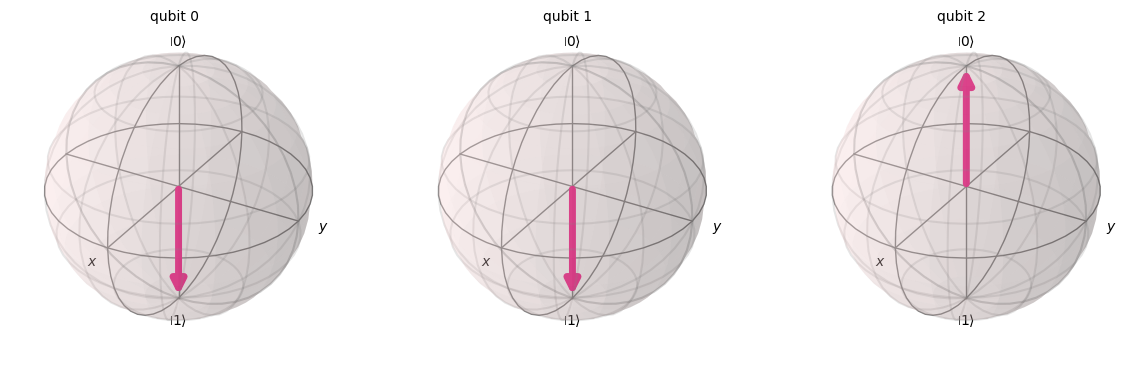

In [18]:
# Visualize the state before QFT
from qiskit.visualization import plot_bloch_multivector

simulator = AerSimulator(method = 'statevector')
qc_init = qc.copy()
qc_init.save_statevector()
statevector = simulator.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

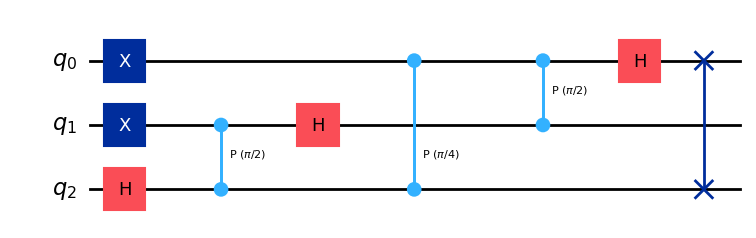

In [19]:
# Apply QFT
qc = qc.compose(QFT(num_qubits).decompose())
qc.draw('mpl')

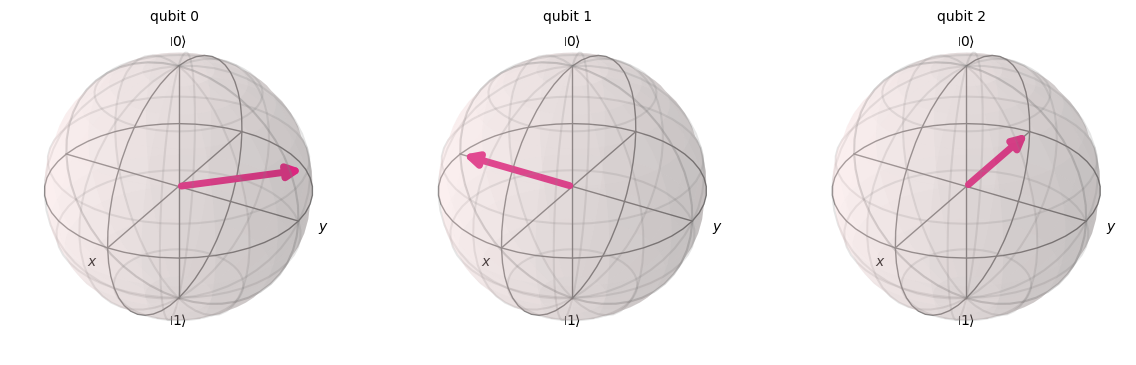

In [20]:
# Visualize the state after QFT
qc.save_statevector()
statevector = simulator.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

### Quantum Phase Estimation (QPE)

Let $U$ be a unitary acts on some $|\psi\rangle$ such that $U|\psi\rangle=e^{2\pi i\theta}|\psi\rangle.$ This global phase cannot be estimated by measuring the state. QPE provides efficient estimate for this $\theta$.

This protocol starts with $|\psi\rangle|0\rangle^{\otimes n}$, and ended up with $\frac {1}{2^n}\sum _{x=0}^{2^{n}-1}\sum _{k=0}^{2^{n}-1}e^{-\frac{2\pi i k}{2^n}(x - 2^n \theta)}|\psi\rangle|x\rangle\approx|\psi\rangle|y\rangle$ for $y=2^n\theta$. Therefore $\theta=\frac{y}{2^n}$.

Let us choose the unitary as $Z$ gate ($\sigma_z$ operation) acting upon the state $|1\rangle$. In this case, $e^{2\pi i\theta}=-1$. Therefore, $\theta = m + \frac{1}{2}$ for some non-negative integer $m$.

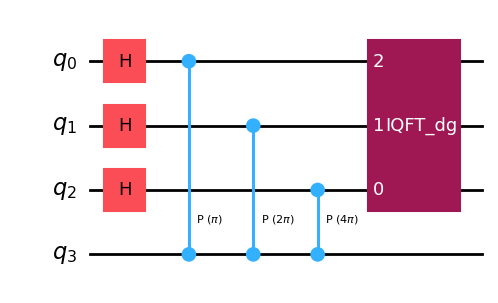

In [21]:
# Import qiskit's in-built QPE
from qiskit.circuit.library import PhaseEstimation as QPE
from qiskit.circuit.library import ZGate

num_qubits = 3

qc = QuantumCircuit(num_qubits+1)
qc = qc.compose(QPE(num_qubits, ZGate()))
qc.decompose().draw('mpl')

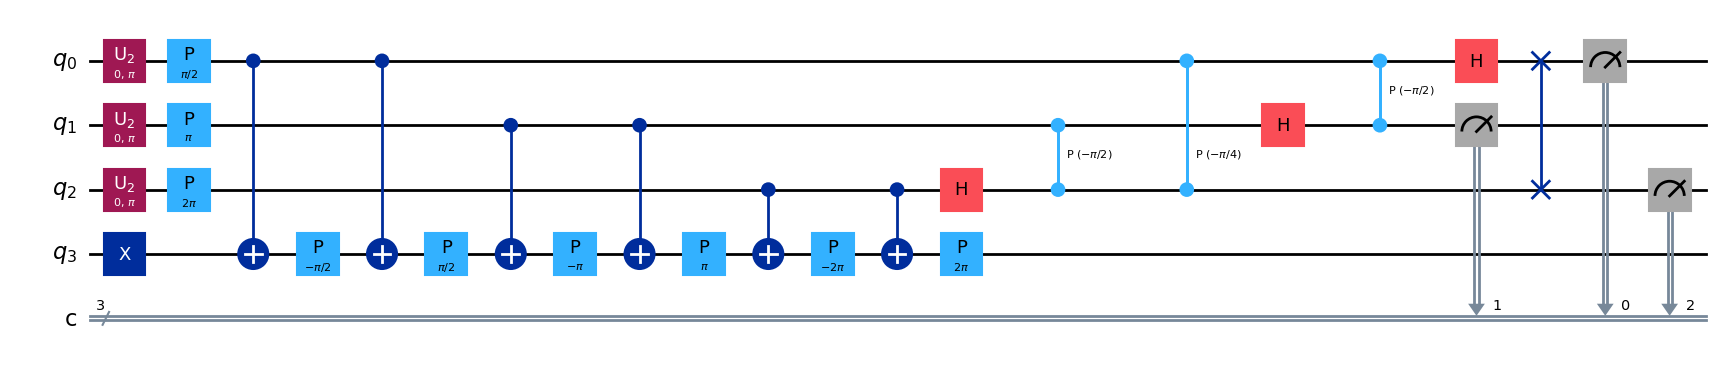

In [22]:
# Start with the state
qc = QuantumCircuit(num_qubits+1, num_qubits)
qc.x(-1)
qc = qc.compose(QPE(num_qubits, ZGate()).decompose().decompose())
for i in range(num_qubits>1):
    qc.swap(i, num_qubits-1)
qc.measure(range(num_qubits), range(num_qubits))
qc.draw('mpl')

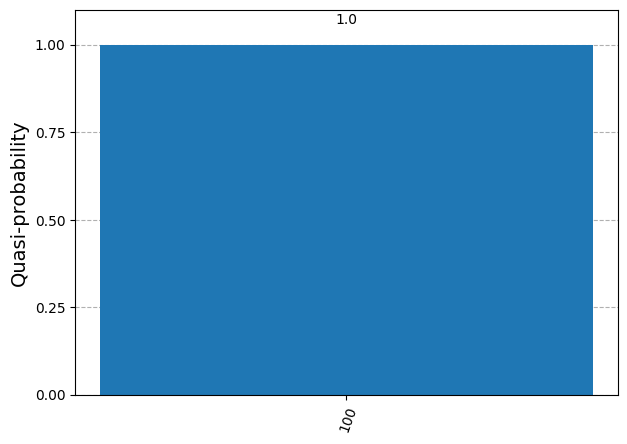

In [23]:
result = simulator.run(qc).result()
counts = result.get_counts()
plot_distribution(counts)

In [24]:
# Get result with maximum probability
max_count = 0
res = 0
for key, value in counts.items():
    if value > max_count:
        res = int(key, 2)

theta = res/(2**num_qubits)

print('theta = ', theta)

theta =  0.5


### Harrow–Hassidim–Lloyd (HHL) Algorithm

To solve `system of linear equations` of the form $\mathbf{Ax=b}$, where $\mathbf{A}$ and $\mathbf{b}$ are known.
![HHL Algorithm](https://www.researchgate.net/profile/Amit-Anand-14/publication/335836247/figure/fig1/AS:803721852252161@1568633630764/HHL-Algorithm-Schematic-a-Phase-estimation-b-R-l-1-rotation-c-Uncomputation_W640.jpg)

We wll take $\mathbf{A}=\begin{pmatrix}1&-\frac{1}{3}\\-\frac{1}{3}&1\end{pmatrix}$ and $\mathbf{b}=\begin{pmatrix}2\\0\end{pmatrix}$. Then $\mathbf{x=A^{-1}b}=\begin{pmatrix}\frac{9}{4}\\\frac{3}{4}\end{pmatrix}=\begin{pmatrix}2.25\\0.75\end{pmatrix}$.<br>
Here we have taken, $U=e^{-iA}$.

In [25]:
from math import pi, log2
from qiskit.quantum_info import Operator
from qiskit.circuit.library import HamiltonianGate

def phase_est(n, l, A, qc):
    clock = QuantumRegister(n, name = 'clock')
    qc.add_register(clock)

    # create gate U_A
    gate = HamiltonianGate(A, 1)

    # Perform QPE
    qc.append(QPE(n, gate), range(n+l)[::-1])

    return gate

def rotation(n, l, qc):
    ancilla = QuantumRegister(1, name = 'ancilla')
    qc.add_register(ancilla)

    # Perform rotation
    for i in range(l, n+l):
        qc.cry(pi/2**i, i, ancilla)

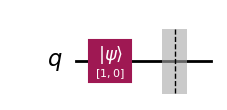

In [26]:
A = Operator([[1, -1/3], [-1/3, 1]])
b = [2, 0]
n = 3
l = int(log2(len(b)))

# Initialize with b
circ = QuantumCircuit(l)
circ.initialize(b/linalg.norm(b))
circ.barrier()
circ.draw('mpl')

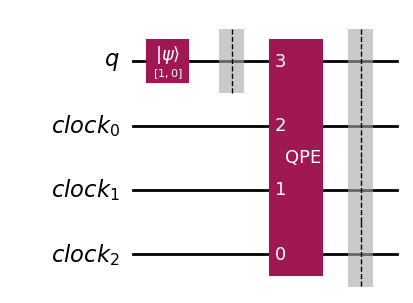

In [27]:
# Perform QPE
gate = phase_est(n, l, A, circ)
circ.barrier()
circ.draw('mpl')

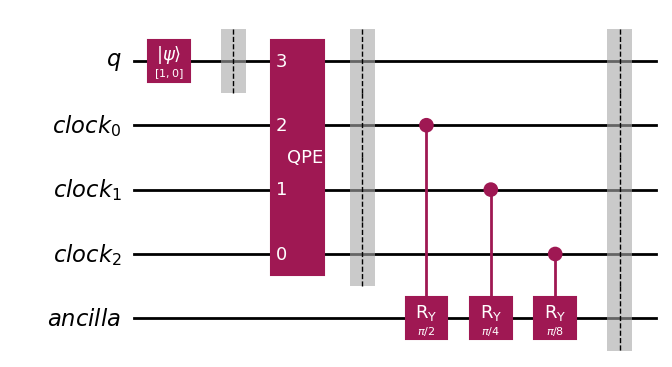

In [28]:
# Perform rotation
rotation(n, l, circ)
circ.barrier()
circ.draw('mpl')

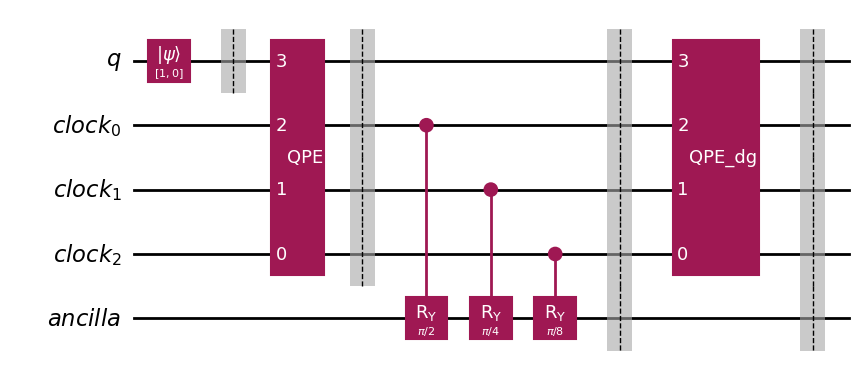

In [29]:
# Uncompute QPE
uncompute = QPE(n, gate).to_gate()
circ.append(uncompute.inverse(), range(n+l)[::-1])
circ.barrier()
circ.draw('mpl')

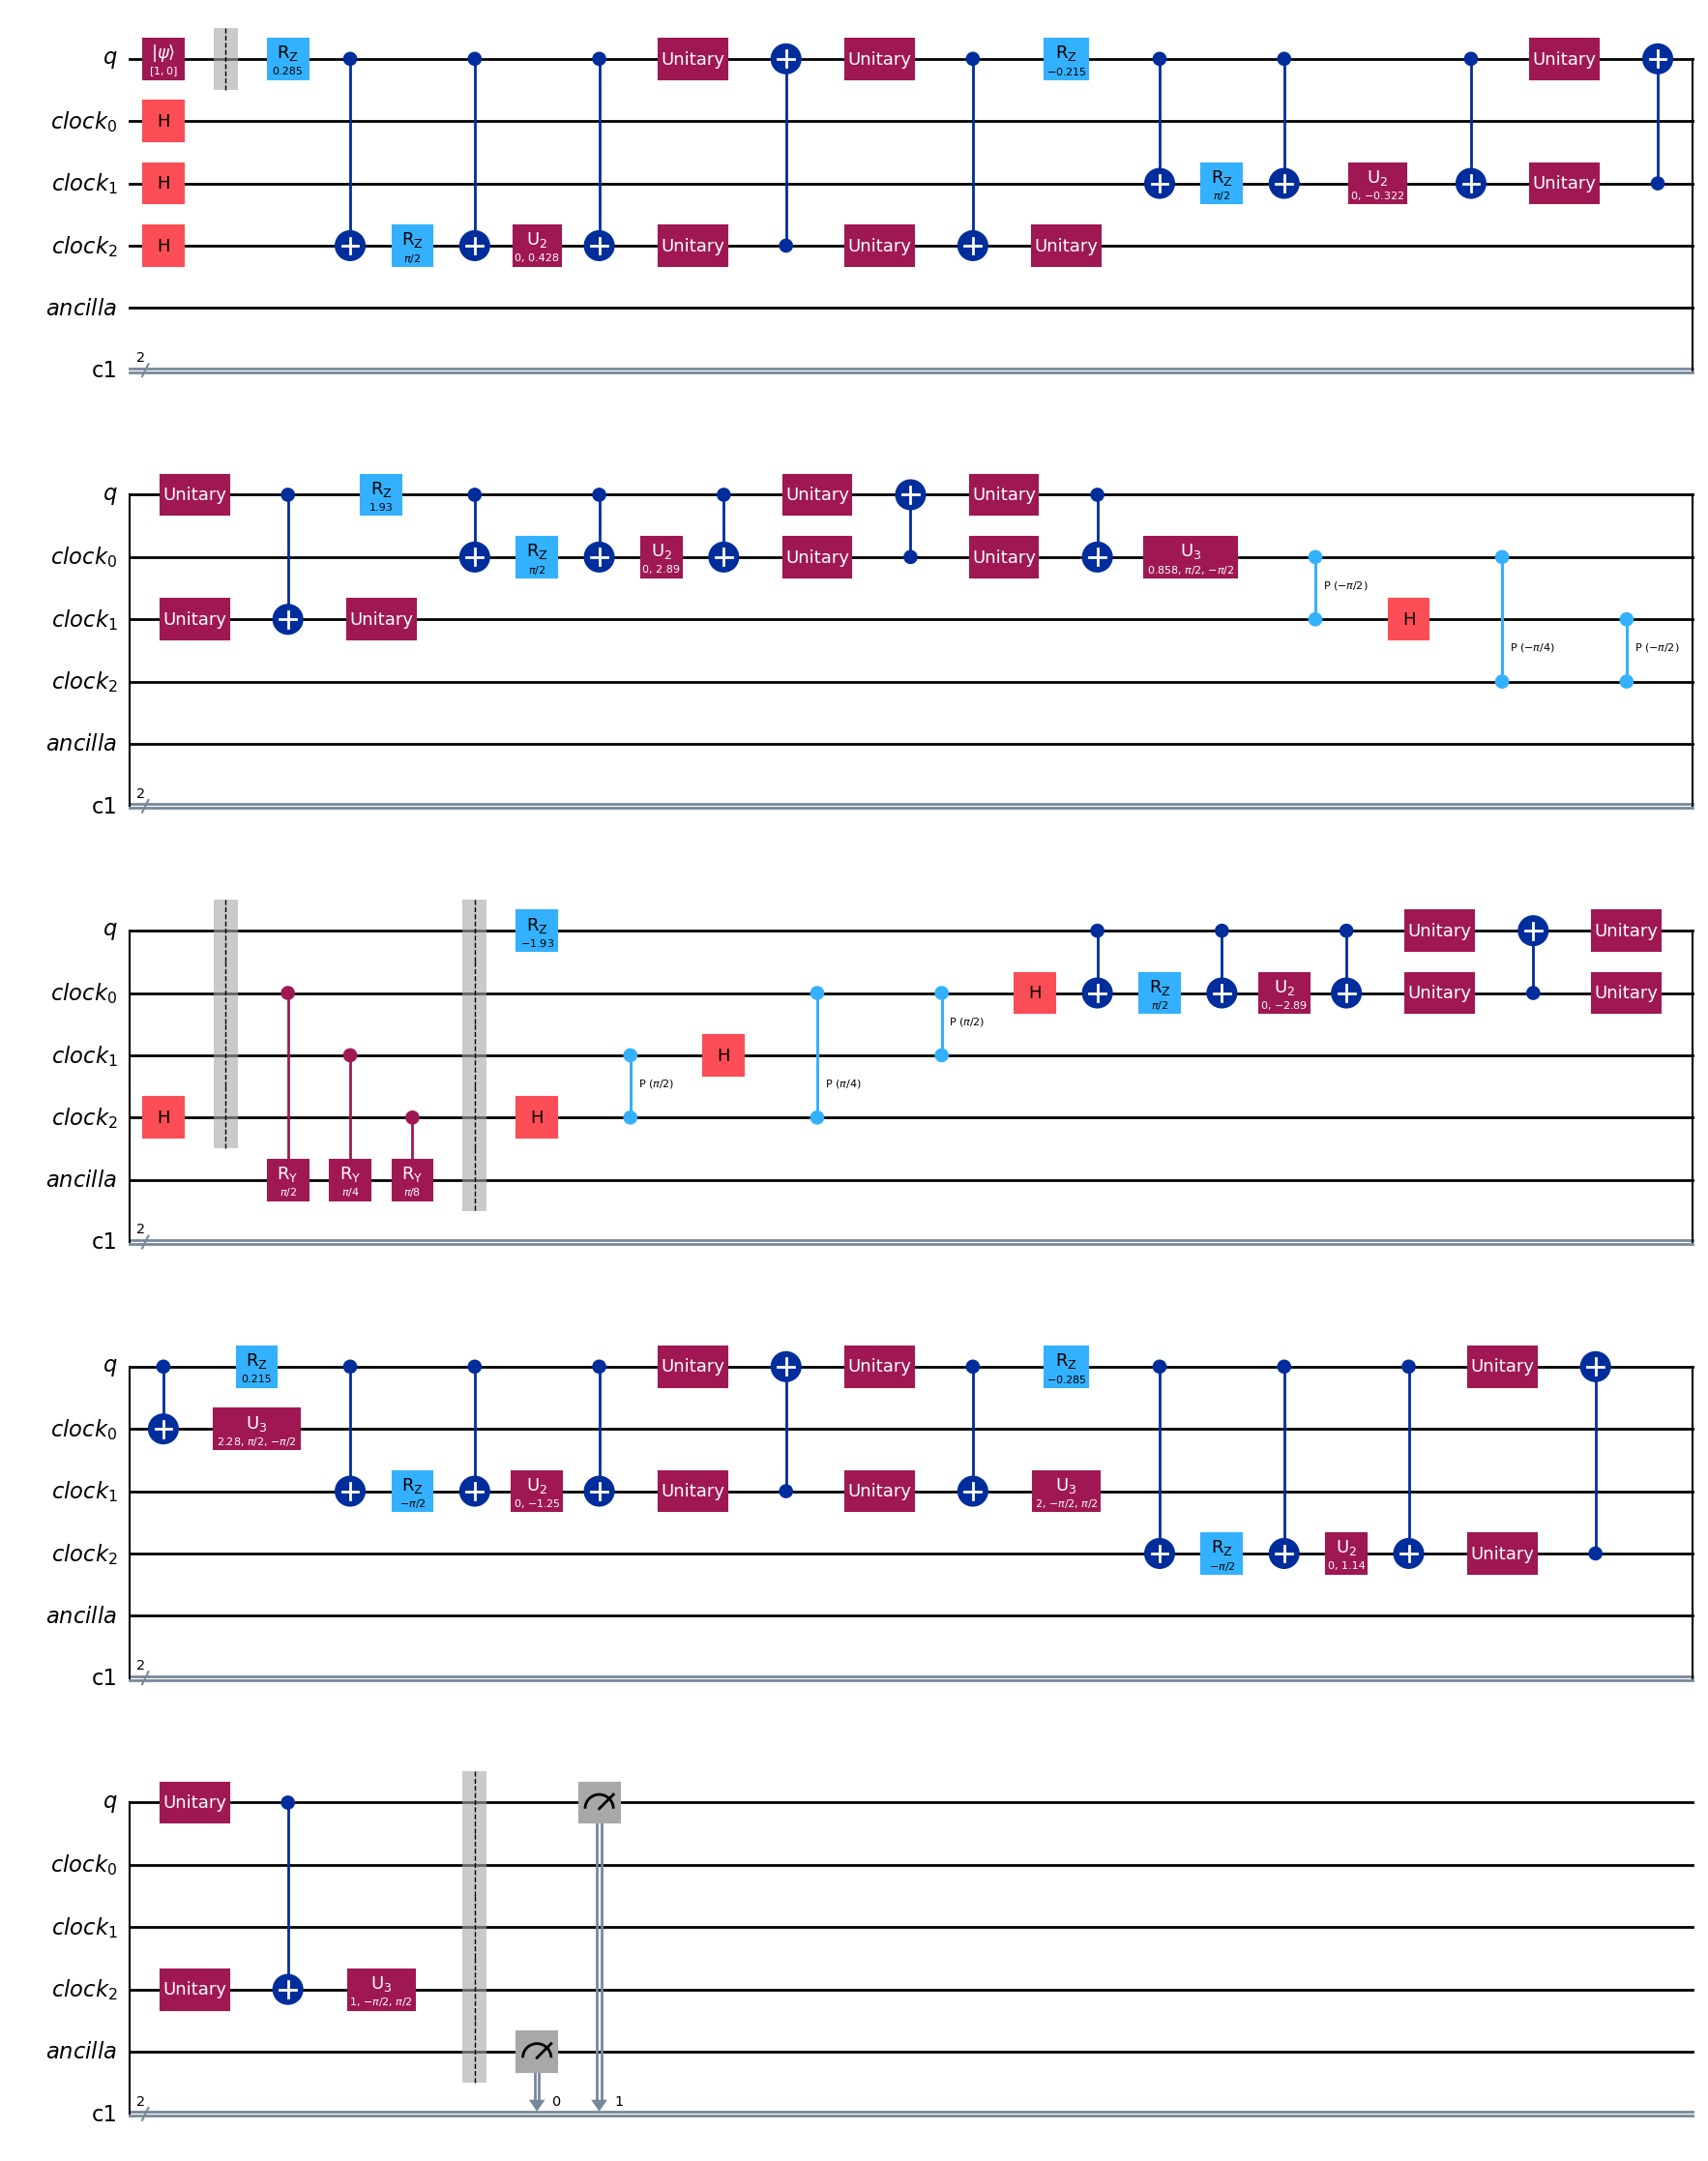

In [30]:
# Measure circuit
meas = ClassicalRegister(l+1)
circ.add_register(meas)
circ.measure([n+l]+list(range(l)), range(l+1))

qc = transpile(circ, simulator)
qc.draw('mpl')

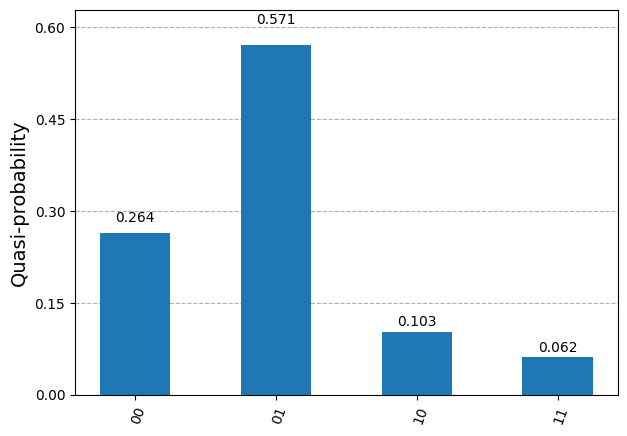

In [31]:
# Run circuit
result = simulator.run(qc, shots = 1000).result()
counts = result.get_counts()
count = {}
for key, value in counts.items():
    if key[-1] == '1':
        count[int(key[:-1],2)] = value
plot_distribution(counts)

In [32]:
sol = []
for i in range(2**l):
    if i in count.keys():
        sol.append([sqrt(count[i]/sum(list(count.values())))])
    else:
        sol.append([0])
print(f'Solution is given by: {sol}')

Solution is given by: [[0.9497650827863977], [0.31296371597958006]]


In [33]:
from numpy import matmul
# Get x
B = list(matmul(A, sol))
i = 0
while not b[i]:
    i += 1
norm_x = b[i]/B[i]
x = [s*norm_x for s in sol]
print(f'x is given by: {x}')

x is given by: [array([2.24678455+0.j]), array([0.74035365+0.j])]


### Reference

1. M. A. Nielsen, I.L. Chuang, Quantum Computation and Quantum Information.
2. Harry Buhrman, Richard Cleve, John Watrous, and Ronald de Wolf, Phys. Rev. Lett. **87**, 167902.
3. Aram W. Harrow, Avinatan Hassidim, and Seth Lloyd, Phys. Rev. Lett. **103**, 150502.
4. https://arxiv.org/abs/1307.0411
5. IBM Quantum Learning: https://learning.quantum.ibm.com/.